## Aufgabe 

In dieser Aufgabe geht es darum die Orientierung eines einzelnen Objekts in Binärbildern zu bestimmen.
Bei den Beispiel-Objekten handelt es sich um Buchstaben. Auf den mitgelieferten .png Bildern ist jeweils ein einzelner Buchstabe abgebildet.
Diese Buchstaben könnten zum Beispiel das Zwischenergebnis eines Texterkennungssystems sein.

Die Aufgabe ist in zwei Teile geteilt. Zunächst geht es in **Teil 1** darum ein Bild einzulesen und für die weitere Verarbeitung vorzubereiten.
In **Teil 2** interpretieren wir die schwarzen Pixel im Bild als Massenverteilung und benutzen das Konzept der Trägheitsmomente, um die Gestalt und die Orientierung des Objekts zu beschreiben.

### Teil 1
1. Verwenden Sie den Befehl <code>plt.imread()</code> um eines der beiliegenden Bilder in ein Numpy Array <code>A</code> einzulesen.
2. Erzeugen Sie eine <code>Figure</code> mit zwei Subplots.
3. Plotten Sie im ersten Subplot mittels <code>plt.imshow(A)</code> das Array <code>A</code>.
4. Stellen Sie im zweiten Subplot nur den Rotkanal dar: <code>plt.imshow(A[:,:,0], cmap = 'binary')</code>. 
5. Fügen Sie zum zweiten Subplot eine Colorbar hinzu (<code>plt.colorbar()</code>). Was im ersten Bild entspricht dem Wert 1, was dem Wert 0?
6. Finden Sie einen Weg eine neues Array <code>M</code> zu erstellen, in dem genau die inversen Werte zum Punkt 5 gespeichert sind.


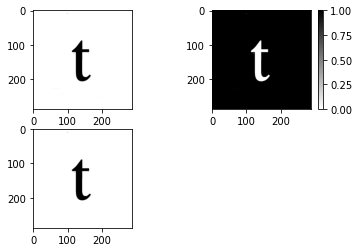

In [1]:
import numpy as np
import matplotlib.pyplot as plt
A = plt.imread('t.png')
plt.subplot(2,2,1)
plt.imshow(A)

plt.subplot(2,2,2)
plt.imshow(A[:,:,0], cmap = 'binary')
plt.colorbar()

M = 1-A[:,:,0]
plt.subplot(2,2,3)
plt.imshow(M, cmap = 'binary')



1.### Teil 2

#### Theorie

Um nun die Gestalt des Objekts und seine Ausrichtung zu ermitteln interpretiert man die Pixelverteilung als Masseverteilung $m(x,y)$.
Hierfür geht man wie folgt vor:
1. Zunächst ermittelt man den Schwerpunkt der Masseverteilung. Dieser ist formal definiert durch
   \begin{equation}
    \left( \begin{matrix} \bar{x} \\ \bar{y} \end{matrix} \right)    = \frac{1}{\mu_{00}} 
     \iint\left( \begin{matrix} x \\ y \end{matrix} \right)
     f(x,y) \, dx dy \, , \quad \mu_{00} = \iint f(x,y) \, dx dy \, .
   \end{equation}
   Für die diskreten Massenelemente (Pixel) ist dies also
   \begin{equation}
        \left( \begin{matrix} \bar{x} \\ \bar{y} \end{matrix} \right)
    =  \frac{1}{\mu_{00}}
    \sum_i \sum_j \left( \begin{matrix} x_j \\ y_i \end{matrix} \right)
    f(x_j,y_i) \, , \quad \mu_{00} = \sum_i \sum_j f(x_j, y_i) \, .
    \end{equation}
    Die Werte $f(x_j, y_i)$ sind dabei die Matrixelemente $M_{ij}$ und wir können 
    $x_j =j$ und $y_i=i$ wählen, womit wir
    \begin{equation}
        \left( \begin{matrix} \bar{x} \\ \bar{y} \end{matrix} \right)
       = \frac{1}{\mu_{00}} 
    \sum_i \sum_j \left( \begin{matrix} j \\ i \end{matrix} \right)
M_{ij}\,  , \quad \mu_{00} = \sum_i \sum_j M_{ij} \, .
       \end{equation}
      erhalten.
   
2. Kennt man die Koordinate des Schwerpunkts, berechnet man die Trägheitsmomente $\mu_{11}, \mu_{20}, \mu_{02}$
   im Schwerpunktssystem des Körpers,
   \begin{equation}
        \mu_{pq} = \iint (x-\bar{x})^p (y-\bar{y})^q f(x,y) \, dx dy \, .
   \end{equation}
   Für die diskreten Massenelemente wird dies zu
   \begin{equation}
        \mu_{pq} = \sum_i \sum_j (j-\bar{x})^p (i-\bar{y})^q M_{ij} \, .
      \end{equation}

3. Im Hauptachsensystem, ein um das bisher verwendete Koordinatensystem um den Winkel $\theta$ rotiertes
   System, wird das Trägsheitsmoment $\mu_{20}$ maximal und gleichzeitig $\mu_{02}$ minimal. Seien diese
   Trägheitsmomente im Hauptachsensystem $I_1$ und $I_2$. Man erhält $I_{1,2}$ aus der Gleichung
    \begin{equation}     
      I_{1,2} = \left[ (\mu_{20} + \mu_{02}) 
               \pm
              \sqrt{(\mu_{20}-\mu_{02})^2 + 4 \mu_{11}^2 } \right] / 2 \, .
      \end{equation}
   Der Winkel $\theta$, um das man das bisherige System drehen müsste, um auf das Hauptachsensystem 
   zu kommen, ist 
  \begin{equation}
     \theta = \frac{1}{2} \tan^{-1} 
    \left( \frac{2\mu_{11}}{\mu_{20}-\mu_{02}} \right) \,. 
   \end{equation}
4. Im Hauptachsensystem könnte man die Massenverteilung durch eine Ellipse homogener Masse mit den
   beiden Radien 
   \begin{equation}
       a = 2 \sqrt{ I_1 / \mu_{00}} \, , \quad  b = 2 \sqrt{ I_2 / \mu_{00}} \, .
   \end{equation}
   ersetzen.
   
#### Umsetzung

1. Berechnen Sie $\mu_{00}$.
2. Bestimmen Sie die Koordinate $\vec{r}_0$ des Massenschwerpunkts
   (Check: Für das Bild <code>t.png</code> müssen Sie etwa (136.6/150.9) erhalten).
3. Berechnen Sie die die Trägheitsmomente $\mu_{11}, \mu_{20}, \mu_{02}$.
4. Bestimmen Sie $\theta$.
5. Bestimmen Sie $a$ und $b$.
6. Stellen Sie die Ergebnisse mit dem folgenen Plotbefehl dar:
    ```Python
    phi = np.linspace(0,2*np.pi)
    ex = b*np.sin(phi)
    ey = a*np.cos(phi)

    exr = np.cos(theta) * ex - np.sin(theta) * ey
    eyr = np.sin(theta) * ex + np.cos(theta) * ey
    exr = exr + r0[0]
    eyr = eyr + r0[1]

    plt.figure()
    plt.imshow(M, cmap='binary')
    plt.plot(r0[0],r0[1],'r+')
    plt.plot(exr, eyr, 'b-')
    ```
7. Ermitteln Sie, um wieviel Grad das Bild <code>t_rot.png</code> gegenüber <code>t.png</code> verdreht wurde.

2484.765
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
159459.15670277365
235444.86814604138
2826910.290095828
-0.06122458413360227
67.5760691683432 19.060052659123006


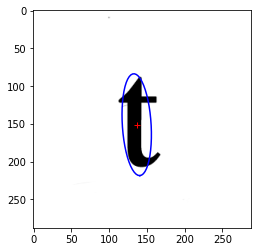

In [16]:
import math as m
B = plt.imread('t.png')
mu00 = 0
#n = np.shape(A)
N = 1-B[:,:,0]
mu00 = np.sum(N)
print(mu00)
###############################
# Koordinate r0 = (x0,y0) des Schwerpunkts
# der Massenverteilung berechnen
##############################
n = np.shape(N)
print(N)
x0 = 0
y0 = 0
for i in range(n[0]):
    for j in range(n[1]):
        x0 += j*(N[i][j])
        y0 += i*N[i,j]
x0 = x0/mu00
y0 = y0/mu00

#############################
# Trägheitsmomente berechnen:
#############################

mu11 = 0
mu20 = 0
mu02 = 0

for i in range(n[0]):
    for j in range(n[1]):
        mu11 += ((j-x0)**1)*((i-y0)**1)*(N[i,j]) 
        mu20 += ((j-x0)**2)*((i-y0)**0)*(N[i,j]) 
        mu02 += ((j-x0)**0)*((i-y0)**2)*(N[i,j]) 
print(mu11)
print(mu20)
print(mu02)
theta = 0.5 * m.atan((2*mu11)/(mu20-mu02))
print(theta)

I1 = 0.5* ((mu20+mu02)+m.sqrt((mu20-mu02)**2+4*mu11**2))
I2 = 0.5* ((mu20+mu02)-m.sqrt((mu20-mu02)**2+4*mu11**2))

a = 2* m.sqrt(I1/mu00)
b = 2* m.sqrt(I2/mu00)
print(a,b)
r0 = [x0,y0]
phi = np.linspace(0,2*np.pi)
ex = b*np.sin(phi)
ey = a*np.cos(phi)

exr = np.cos(theta) * ex - np.sin(theta) * ey
eyr = np.sin(theta) * ex + np.cos(theta) * ey
exr = exr + r0[0]
eyr = eyr + r0[1]
print(theta)
plt.figure()
plt.imshow(M, cmap='binary')
plt.plot(r0[0],r0[1],'r+')
plt.plot(exr, eyr, 'b-')

#plt.subplot(2,1,2)
C = plt.imread('t_rot.png')
#plt.imshow(C, cmap='binary')


2482.2354
587207.1809188379
365449.8403765737
2695947.122106243
-0.23339450690356794


0.17216992276996568

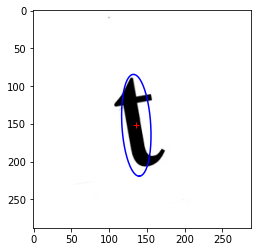

In [22]:
import math as m
C = plt.imread('t_rot.png')
mu00 = 0
#n = np.shape(A)
O = 1-C[:,:,0]
mu00 = np.sum(O)
print(mu00)
###############################
# Koordinate r0 = (x0,y0) des Schwerpunkts
# der Massenverteilung berechnen
##############################
k = np.shape(O)

x0 = 0
y0 = 0
for i in range(k[0]):
    for j in range(k[1]):
        x0 += j*(O[i][j])
        y0 += i*O[i,j]
x0 = x0/mu00
y0 = y0/mu00

#############################
# Trägheitsmomente berechnen:
#############################

mu11 = 0
mu20 = 0
mu02 = 0

for i in range(n[0]):
    for j in range(n[1]):
        mu11 += ((j-x0)**1)*((i-y0)**1)*(O[i,j]) 
        mu20 += ((j-x0)**2)*((i-y0)**0)*(O[i,j]) 
        mu02 += ((j-x0)**0)*((i-y0)**2)*(O[i,j]) 
print(mu11)
print(mu20)
print(mu02)
theta1 = 0.5 * m.atan((2*mu11)/(mu20-mu02))
print(theta1)

I1 = 0.5* ((mu20+mu02)+m.sqrt((mu20-mu02)**2+4*mu11**2))
I2 = 0.5* ((mu20+mu02)-m.sqrt((mu20-mu02)**2+4*mu11**2))

a = 2* m.sqrt(I1/mu00)
b = 2* m.sqrt(I2/mu00)
#print(a,b)
r0 = [x0,y0]
phi = np.linspace(0,2*np.pi)
ex = b*np.sin(phi)
ey = a*np.cos(phi)

exr = np.cos(theta) * ex - np.sin(theta) * ey
eyr = np.sin(theta) * ex + np.cos(theta) * ey
exr = exr + r0[0]
eyr = eyr + r0[1]

plt.figure()
plt.imshow(C, cmap='binary')
plt.plot(r0[0],r0[1],'r+')
plt.plot(exr, eyr, 'b-')

winkel = theta - theta1
winkel
